In [27]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,normalize 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [28]:
heart = pd.read_csv("fsv2heart.csv")
heart.dtypes
heart.iloc[1:3,:]

,thalach,oldpeak,ca,cp,thal_3,cp_0,exang,thal_2,slope_2,chol,age,cp_2,slope_1,target
1,187,3.5,0,2,0,0,0,1,0,250,37,1,0,1
2,172,1.4,0,1,0,0,0,1,1,204,41,0,0,1


In [29]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
heart = pd.DataFrame(scaler.fit_transform(heart), columns=heart.columns, index=heart.index)
heart.dtypes
heart.iloc[1:3,:]

,thalach,oldpeak,ca,cp,thal_3,cp_0,exang,thal_2,slope_2,chol,age,cp_2,slope_1,target
1,0.885496,0.564516,0.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.283105,0.166667,1.0,0.0,1.0
2,0.770992,0.225806,0.0,0.333333,0.0,0.0,0.0,1.0,1.0,0.178082,0.250000,0.0,0.0,1.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'],random_state = 0,test_size = 0.2)
model=SVC(kernel='linear')
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8852459016393442

In [33]:
cv_r2_scores_rf = cross_val_score(model,heart.drop('target', 1),heart['target'], cv=10)
for row in cv_r2_scores_rf:
 print(row)
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

0.8709677419354839
0.8387096774193549
0.8709677419354839
0.9354838709677419
0.8709677419354839
0.8
0.8666666666666667
0.7666666666666667
0.7241379310344828
0.7931034482758621
Mean 10-Fold R Squared: 0.8337671486837227


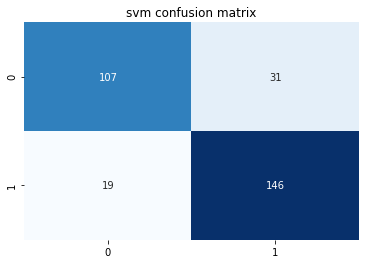

In [34]:
crossmodel = cross_val_predict(model,heart.drop('target', 1),heart['target'],cv=10)
conf_mat = confusion_matrix(heart['target'],crossmodel)
plt.title("svm confusion matrix")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)